In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/bankpep.csv')
df

,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,ID12101,48,FEMALE,INNER_CITY,17546.00,NO,1,NO,NO,NO,NO,YES
1,ID12102,40,MALE,TOWN,30085.10,YES,3,YES,NO,YES,YES,NO
2,ID12103,51,FEMALE,INNER_CITY,16575.40,YES,0,YES,YES,YES,NO,NO
3,ID12104,23,FEMALE,TOWN,20375.40,YES,3,NO,NO,YES,NO,NO
4,ID12105,57,FEMALE,RURAL,50576.30,YES,0,NO,YES,NO,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...,...
595,ID12696,61,FEMALE,INNER_CITY,47025.00,NO,2,YES,YES,YES,YES,NO
596,ID12697,30,FEMALE,INNER_CITY,9672.25,YES,0,YES,YES,YES,NO,NO
597,ID12698,31,FEMALE,TOWN,15976.30,YES,0,YES,YES,NO,NO,YES
598,ID12699,29,MALE,INNER_CITY,14711.80,YES,0,NO,YES,NO,YES,NO


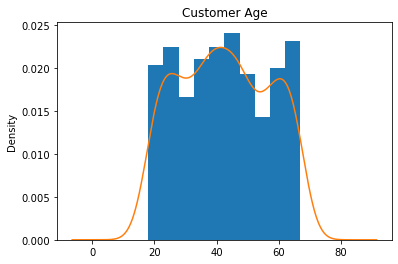

In [3]:
# 年龄分布的直方图和密度图
# 'normed' is deprecated, use 'density' instead
df["age"].plot(kind='hist', density=True, title='Customer Age')
df["age"].plot(kind='kde')
plt.show()

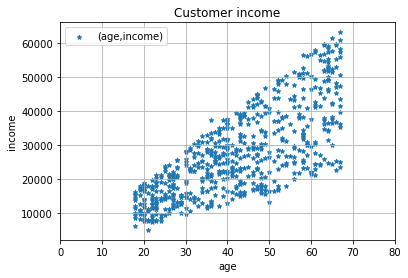

In [4]:
# 年龄和收入关系的散点图
df.plot(kind='scatter', x='age', y='income', grid=True,
         xlim=[0,80], marker='*', label='(age,income)',
         title='Customer income')
plt.show()

array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='income', ylabel='age'>,
        <AxesSubplot:xlabel='children', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='income'>,
        <AxesSubplot:xlabel='income', ylabel='income'>,
        <AxesSubplot:xlabel='children', ylabel='income'>],
       [<AxesSubplot:xlabel='age', ylabel='children'>,
        <AxesSubplot:xlabel='income', ylabel='children'>,
        <AxesSubplot:xlabel='children', ylabel='children'>]], dtype=object)

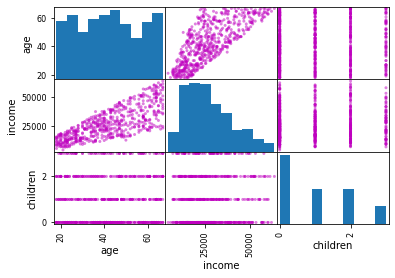

In [5]:
data = df[['age','income','children']]
pd.plotting.scatter_matrix(data, diagonal='hist', color='m')

<AxesSubplot:xlabel='region'>

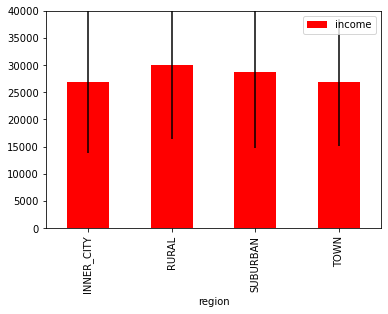

In [31]:
reg = df.groupby('region').aggregate({'income':np.mean})
std = df.groupby('region').aggregate({'income':np.std})
reg.plot(kind='bar', ylim=[0,40000], yerr=std, color='r')

<AxesSubplot:ylabel='children'>

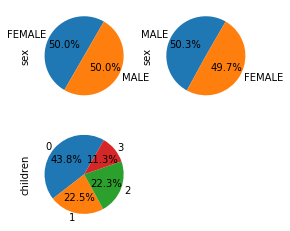

In [49]:
fig = plt.figure(figsize=(4,4))
ax1 = fig.add_subplot(2,2,1)
data1 = df['sex'].value_counts()
data1.plot(kind='pie', ax=ax1, startangle=60, autopct="%1.1f%%")
ax2 = fig.add_subplot(2,2,2)
data2 = df[df['car']=='YES']['sex'].value_counts()
data2.plot(kind='pie', ax=ax2, startangle=60, autopct="%1.1f%%")
ax3 = fig.add_subplot(2,2,3)
data3 = df['children'].value_counts()
data3.plot(kind='pie', ax=ax3, startangle=60, autopct="%1.1f%%")
plt.show()

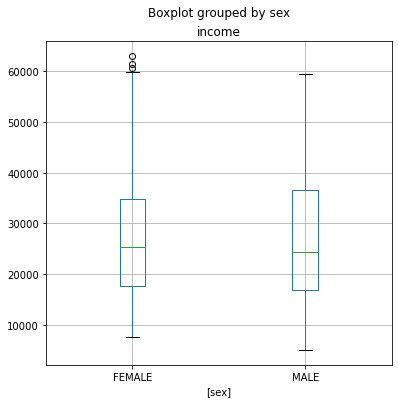

In [53]:
data = df[['sex','income']]
data.boxplot(by='sex', figsize=(6,6))
plt.show()